# **Importing libraries**

In [1]:
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi
!pip install tflearn
!pip  install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for qalsadi from https://files.pythonhosted.org/packages/60/d4/cec78d96862c7afd8cddf3d214c02a5d1a04c680b704575e31539a76c674/qalsadi-0.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Obtaining dependency information for arramooz-pysqlite>=0.4.2 from https://files.pythonhosted.org/packages/21/d4/9794baabccc4ad00c1b63571f66c041709963b57b595a3cb441789138758/arramooz_pysqlite-0.4.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for mysam-tagmanager>=0.3.3 from https://files.pythonhosted.o

In [2]:
!pip install --upgrade tensorflow
!pip install keras_preprocessing

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e3/ba/aa8a76eff5c20761b0361a5b4c9fccb8742c29a82adba7a8ad8ae819984e/tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/d1/1d/d5cf76e5e40f69dbd273036e3172ae4a614577cb141673427b80cac948df/ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.2 MB/s eta 0:00:00-:--:--
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/6e/0c/1059a6682cf2cc1fcc0d5327837b5672fe4f5574255fa5430d0a8ceb75e9/tensorboard-2.15.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/b6/c8/2f823c8958d5342eafc6dd3e922f0cc4fcf8c2e0460284cc462dae3b60a0/t

In [3]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import re
import emoji
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import qalsadi.lemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

2023-12-24 20:07:33.186864: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 20:07:33.186935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 20:07:33.188328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Reading Data**

In [4]:
df=pd.read_excel('/kaggle/input/arabic-sentiment-analysis-nlp/train.xlsx')
print(df.head(10))

                                  review_description  rating
0  شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...      -1
1  خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...       1
2  تطبيق غبي و جاري حذفه ، عاملين اكواد خصم و لما...      -1
3  فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...       1
4  سيء جدا ، اسعار رسوم التوصيل لا تمت للواقع ب ص...      -1
5  قعد عشرين سنة يدور على سائق بس اما عن توصيل ال...       0
6                                         احلئ تطبيق       1
7                                      رائع واو مدهش       1
8  مکو بس البحرین وعمان وغیرهه بس العراق مکو یعنی...      -1
9                    تطبيق جميل يستاهل الخمس نجوم👍👍👍       1


In [5]:
test_df=pd.read_csv('/kaggle/input/arabic-sentiment-analysis-nlp/test _no_label.csv')

# **Data Exploration**

In [6]:
df.rating.value_counts()

rating
 1    19189
-1    11340
 0     1507
Name: count, dtype: int64

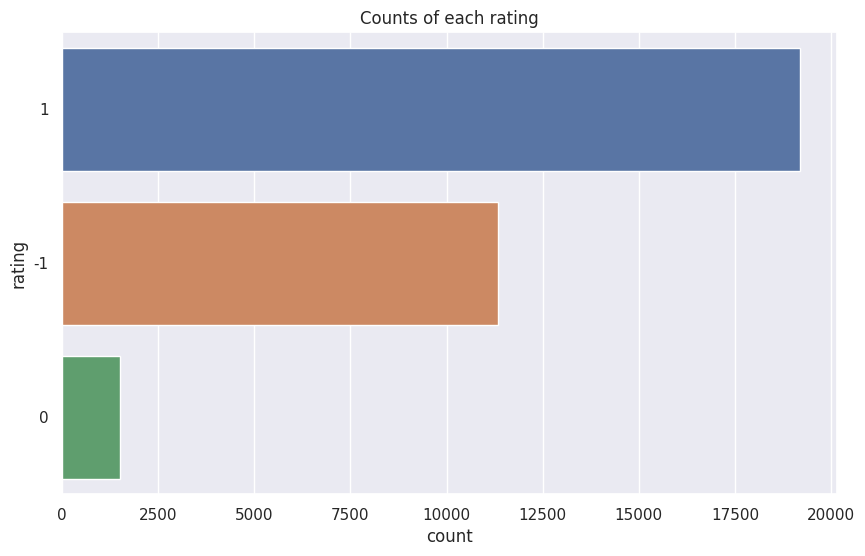

In [7]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data = df, y='rating',
              order = df['rating'].value_counts().index)
plt.title('Counts of each rating')
plt.show()

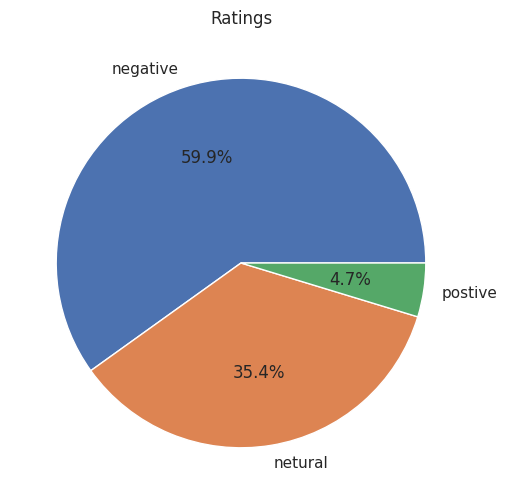

In [8]:
labels = ['negative','netural','postive']
plt.pie(df.rating.value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Ratings')
plt.show()

## Checking for English Entries

In [9]:
import pandas as pd
import langid


# Function to check if a text is in English
def is_english(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

# Filter and display only the rows with English review descriptions
english_df = df[df['review_description'].apply(is_english)]
print(english_df)


                                      review_description  rating
25                              l love thes applications       1
79     Cannot find my location and cannot accept my m...      -1
159                                                Money       1
184    Very bad application to much disturb in YouTub...      -1
192                                                  ٠٠٠       1
...                                                  ...     ...
31863                                                O.k       1
31865                                    Fake promocodes      -1
31881                                        Verey goods       1
31989                                         Good shiit       1
32032                                         y love you       1

[780 rows x 2 columns]


# **Data Cleaning**

In [10]:
print(test_df.isnull().sum())

ID                    0
review_description    0
dtype: int64


In [11]:
#checking null values
print(df.isnull().sum())
df.dropna(inplace=True)

review_description    0
rating                0
dtype: int64


In [12]:
#check duplicated
print(df.review_description.duplicated().sum())
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)
df.review_description.duplicated().sum()

726


0

# **Text processing**

## **Handling Emojis**

In [13]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",    
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"عدم الراحة",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "✋🏼":"كف ايد",    
    "👐":"ايدي مفتوحه",      
    "☠️":"وجه مرعب",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"وجه حزين",      
    "☹️":"وجه يائس",     
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "💋":  "بوسه",
    "👇":"لاسفل",     
    "❣️":"حب",     
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"دايخ",      
    "😈":"رعب",      
    "🏃":"يجري",      
    "✌🏻":"علامه النصر",    
    "🔫":"يضرب",      
    "❗️":"تعجب",
    "👎":"غير موافق",      
    "🔐":"قفل",      
    "👈":"لليمين",
    "™":"رمز",    
    "🚶🏽":"يتمشي",    
    "😯":"متفاجأ",  
    "✊":"يد مغلقه",    
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله صغيره",     
    "🔴":"دائره حمراء",      
    "💪🏽":"قوه",     
    "💤":"ينام",     
    "👀":"ينظر",     
    "✍🏻":"يكتب",  
    "❄️":"تلج",
    "💀":"رعب",   
    "😤":"وجه عابس",      
    "🖋":"قلم",      
    "🎩":"كاب",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "💓":"حب",      
    "☄️ ":"نار",     
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن"
    }

In [14]:
emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [15]:
df.head(10)

,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه ، عاملين اكواد خصم و لما...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا ، اسعار رسوم التوصيل لا تمت للواقع ب ص...,-1
5,قعد عشرين سنة يدور على سائق بس اما عن توصيل ال...,0
6,احلئ تطبيق,1
7,رائع واو مدهش,1
8,مکو بس البحرین وعمان وغیرهه بس العراق مکو یعنی...,-1
9,تطبيق جميل يستاهل الخمس نجوم👍👍👍,1


In [16]:
df.review_description[19]

'طلبت طلبيه لي ساعه ويوم اتصلت عليهم قالو طلبكم اللغى حيوانيين ذبحني الجوع 😠'

In [17]:
def checkemojie(text):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
            emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)

In [18]:
def emojiTextTransform(text):
    cleantext=re.sub(r'[^\w\s]','',text)
    return cleantext+" "+checkemojie(text)

In [19]:
df.review_description=df.review_description.apply(lambda x:emojiTextTransform(x))
test_df.review_description=test_df.review_description.apply(lambda x:emojiTextTransform(x))


In [20]:
df.review_description[19]

'طلبت طلبيه لي ساعه ويوم اتصلت عليهم قالو طلبكم اللغى حيوانيين ذبحني الجوع  غاضب'

In [21]:
df.head(10)

,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه عاملين اكواد خصم و لما ...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا اسعار رسوم التوصيل لا تمت للواقع ب صله,-1
5,قعد عشرين سنة يدور على سائق بس اما عن توصيل ال...,0
6,احلئ تطبيق,1
7,رائع واو مدهش,1
8,مکو بس البحرین وعمان وغیرهه بس العراق مکو یعنی...,-1
9,تطبيق جميل يستاهل الخمس نجوم موافق موافق موافق,1


## **Remove Punctuation**

In [22]:
df.review_description=df.review_description.astype(str)
df.review_description=df.review_description.apply(lambda x:re.sub(r'[^\w\s]','',x))

test_df.review_description=test_df.review_description.astype(str)
test_df.review_description=test_df.review_description.apply(lambda x:re.sub(r'[^\w\s]','',x))

In [23]:
df.head()

,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه عاملين اكواد خصم و لما ...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا اسعار رسوم التوصيل لا تمت للواقع ب صله,-1


## **Remove stopwords**

## Arabic & English

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Get the Arabic stopwords
stopWords = set(stopwords.words("arabic"))

# Remove specific words from the list
for word in ['لا', 'لكن', 'ولكن']:
    stopWords.remove(word)

# Replace Arabic stopwords with English stopwords
english_stopwords = set(stopwords.words("english"))

for word in ['not']:
    english_stopwords.remove(word)
    
stopWords.update(english_stopwords)

    
df.review_description=df.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))

test_df.review_description=test_df.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
df.head()

,review_description,rating
0,شركه زباله سواقين بتبرشم مفيش حتي رقم للشكاوي ...,-1
1,خدمة الدفع طريق الكي نت توقفت عندي اصبح فقط ال...,1
2,تطبيق غبي جاري حذفه عاملين اكواد خصم نستخدمها ...,-1
3,فعلا تطبيق ممتاز فى امكانية يتيح لمستخدم التطب...,1
4,سيء جدا اسعار رسوم التوصيل لا تمت للواقع صله,-1


## **Remove Numbers**

In [26]:
df.review_description=df.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))
test_df.review_description=test_df.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))

In [27]:
df.head(10)

,review_description,rating
0,شركه زباله سواقين بتبرشم مفيش حتي رقم للشكاوي ...,-1
1,خدمة الدفع طريق الكي نت توقفت عندي اصبح فقط ال...,1
2,تطبيق غبي جاري حذفه عاملين اكواد خصم نستخدمها ...,-1
3,فعلا تطبيق ممتاز فى امكانية يتيح لمستخدم التطب...,1
4,سيء جدا اسعار رسوم التوصيل لا تمت للواقع صله,-1
5,قعد سنة يدور سائق اما توصيل الأشياء جيد جدا,0
6,احلئ تطبيق,1
7,رائع مدهش,1
8,مکو البحرین وعمان وغیرهه العراق مکو یعنی نجمه ...,-1
9,تطبيق جميل يستاهل الخمس نجوم موافق موافق موافق,1


## **Lemmatizer**

In [28]:
lemmer = qalsadi.lemmatizer.Lemmatizer()
df.review_description=df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
df.review_description=df.review_description.apply(lambda x:" ".join(x))

test_df.review_description=test_df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
test_df.review_description=test_df.review_description.apply(lambda x:" ".join(x))

In [29]:
df.head()

,review_description,rating
0,شرك زبال سواق بتبرشم مفيش حت رقم للشكاوي سواق ...,-1
1,خدم دفع طريق كي نات توقف عند صبح فقط دفع نقد,1
2,تطبيق غب جار حذف عامل اكواد خصم استخدم اكترى م...,-1
3,علا تطبيق ممتاز فى امكانية أتاح مستخدم تطبيق ا...,1
4,ساء جدا اسعار رسوم توصيل لا أمات واقع صل,-1


In [30]:
!pip install spacy
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.8 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
import pandas as pd
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")


def lemmatize_english_spacy(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)


df.review_description = df.review_description.apply(lemmatize_english_spacy)
test_df.review_description=test_df.review_description.apply(lemmatize_english_spacy)

print(df.loc[31865])

review_description    fake promocode
rating                            -1
Name: 31865, dtype: object


## **Transformers**

Encoder-Decoder Architecture with mulit-head attention mechanism.

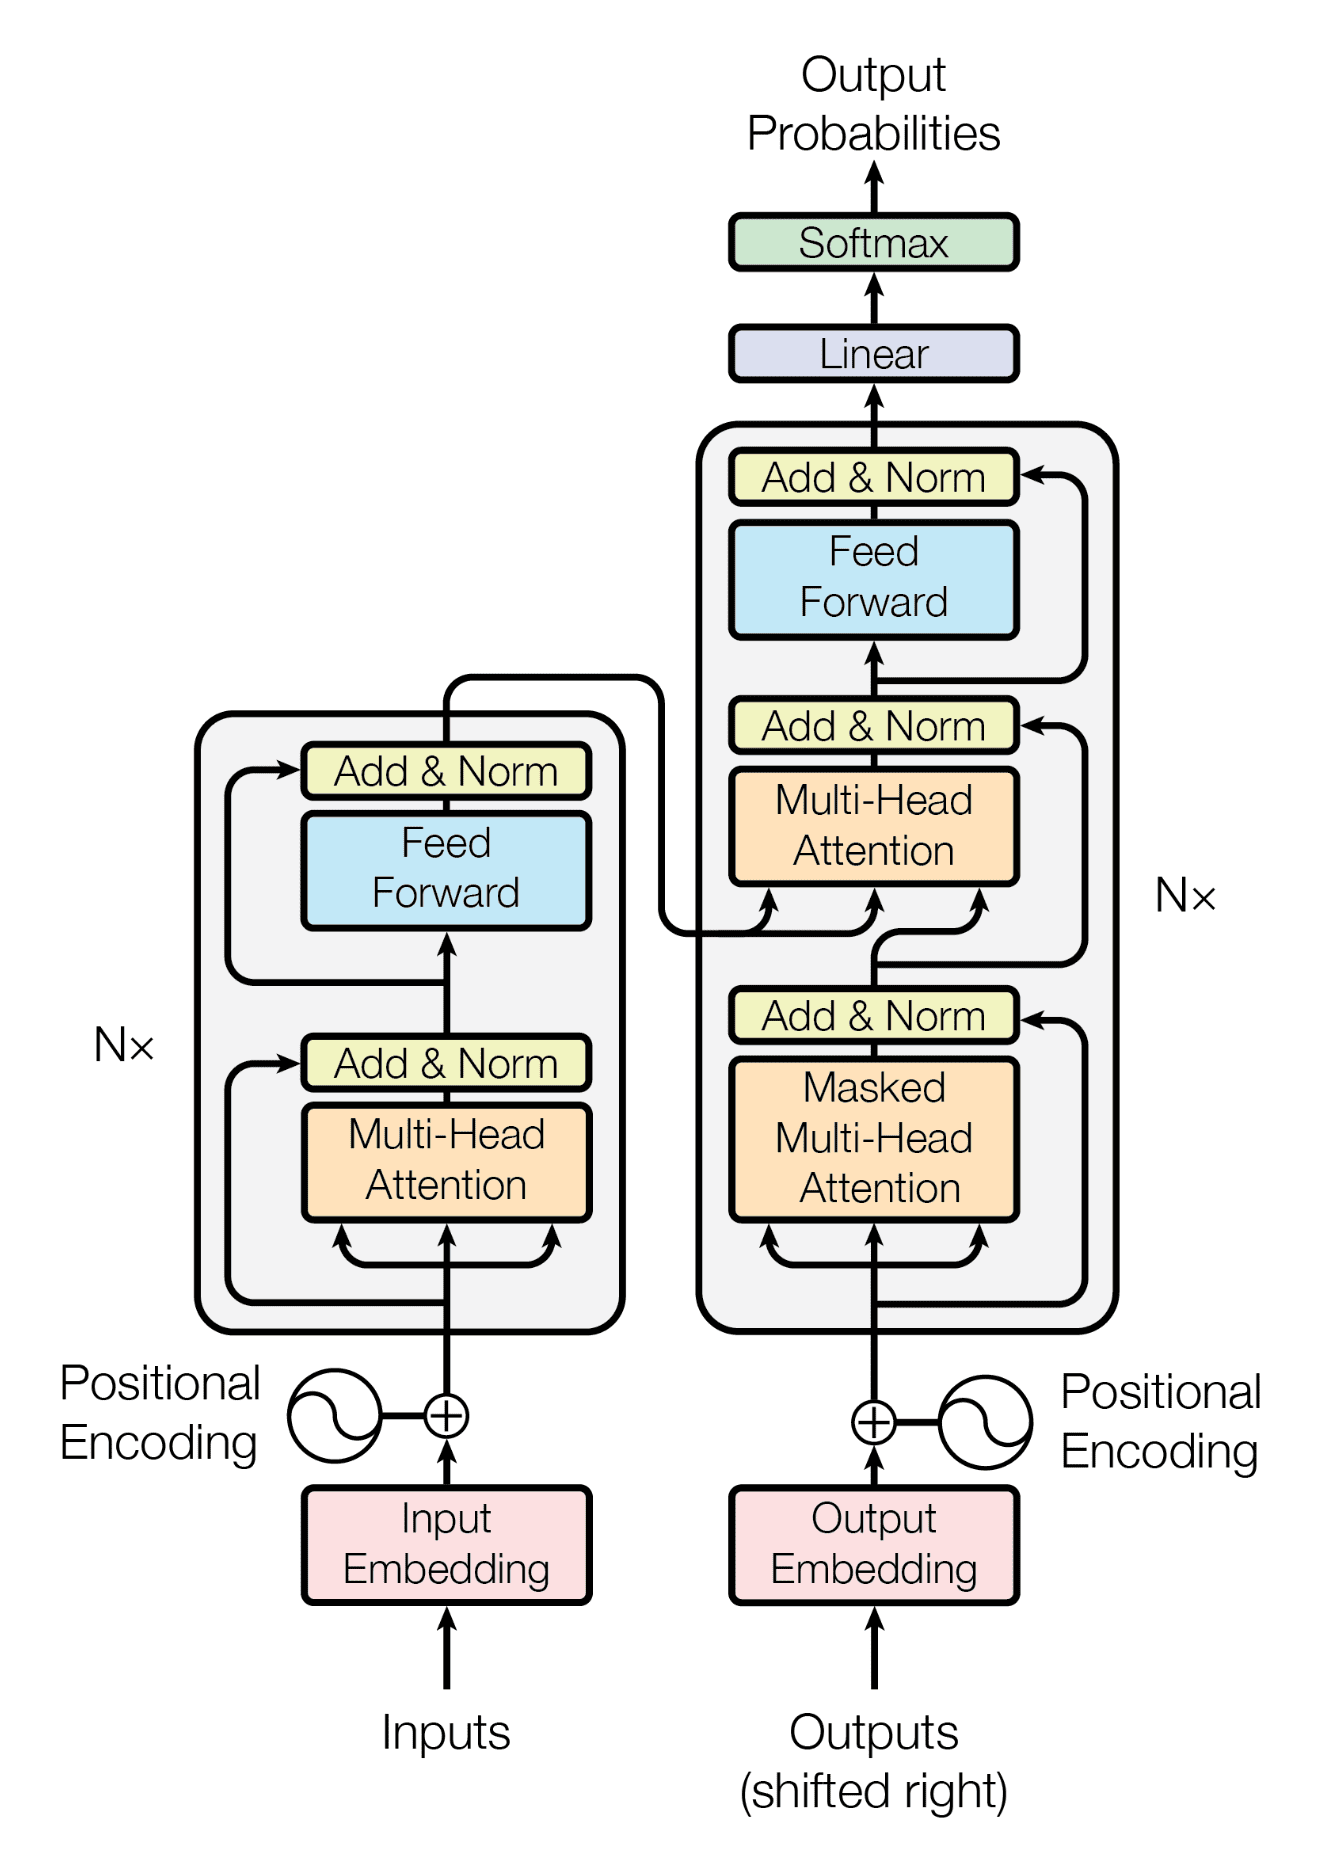

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val, y_train, y_val = train_test_split(df.review_description, df.rating, test_size=0.2, stratify=df.rating, random_state=42)


In [34]:
y_train_encoded = to_categorical(y_train, num_classes=3)
y_val_encoded = to_categorical(y_val, num_classes=3)


In [35]:
y_train

355      1
9806     1
24652   -1
11042    1
27860   -1
        ..
2215     1
19044    1
23111    1
17445    1
24298    1
Name: rating, Length: 25048, dtype: int64

In [36]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  20561


In [37]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)


In [38]:
S=np.array(test_df.review_description)
l = tokenizer.texts_to_sequences(S)
X_test = pad_sequences(l, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [39]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-3)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-3)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [40]:
embed_dim = 50  
heads = 2  
neurons = 48
maxlen = 20
vocab_size = 20708

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddi  (None, 20, 50)            1036400   
 ng (TokenAndPositionEmbedd                                      
 ing)                                                            
                                                                 
 transformer_encoder (Trans  (None, 20, 50)            25448     
 formerEncoder)                                                  
                                                                 
 global_average_pooling1d (  (None, 50)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [42]:
model_name = "model_one.h5"

checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 3, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [43]:
tf.config.run_functions_eagerly(True)


In [44]:
history = model.fit(X_train,y_train_encoded,
                    validation_data=(X_val,y_val_encoded),
                    epochs=25,
                    batch_size=32,
                    callbacks=[earlystopping])

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


783/783 [==============================] - 87s 111ms/step - loss: 0.6061 - accuracy: 0.7609 - val_loss: 0.5014 - val_accuracy: 0.8200
Epoch 2/25
783/783 [==============================] - 86s 110ms/step - loss: 0.4141 - accuracy: 0.8574 - val_loss: 0.5053 - val_accuracy: 0.8264
Epoch 3/25
783/783 [==============================] - 87s 111ms/step - loss: 0.3276 - accuracy: 0.8891 - val_loss: 0.5595 - val_accuracy: 0.8224
Epoch 4/25
783/783 [==============================] - 87s 111ms/step - loss: 0.2674 - accuracy: 0.9124 - val_loss: 0.6298 - val_accuracy: 0.8160
Epoch 4: early stopping


In [45]:
model.save('my_model')

In [46]:
predictions = model.predict(X_test)

 4/32 [==>...........................] - ETA: 0s

/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 1s 21ms/step


In [47]:
predicted_labels = np.argmax(predictions, axis=-1)

In [48]:
mask = predicted_labels == 2

# Replace the values where the mask is True with -1
predicted_labels[mask] = -1

In [49]:
predicted_labels

array([ 1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  0,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  0,  1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1

In [50]:
test_df['rating'] = predicted_labels

# Specify the columns you want to include in the CSV file
selected_columns = ['ID', 'rating']

# Create a new DataFrame with the selected columns
selected_df = test_df[selected_columns]

# Save the selected columns to a CSV file
selected_df.to_csv('my-file.csv', index=False)

In [51]:
test_df

,ID,review_description,rating
0,1,اهنئكم خدم عملاء المحادثه المباشره قصر الله أو...,1
1,2,ممتاز جدا لكن اتمنى ان تكون مسابق جوائز طلبة س...,1
2,3,محمل أقول تم ايقاف حطا عش تسوى خطاء,-1
3,4,شغل طيب,1
4,5,ماجربت,1
...,...,...,...
995,996,استهل,1
996,997,خدم سيئ كل معايير,-1
997,998,لؤيلؤس,1
998,999,تطبيق صادق خصم كوبون,-1


## **LSTM**

# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [52]:
length_of_the_messages = df["review_description"].str.split("\\s+")
max_number_of_words = df['review_description'].str.len().max()
# print(length_of_the_messages)
print("Max number of words = ", max_number_of_words)
print("Index = ", length_of_the_messages.str.len().idxmax())

Max number of words =  1453
Index =  21351


In [53]:
## total unique words in reviews
t = ''
for i in df["review_description"]:
    t=t+' '+i
t=t.split()
unique_words=len(set(t))
print('total unique words in review: ',unique_words)


total unique words in review:  23892


In [54]:
# fit tokenize in training set, reserve for unknown
tokenizer = Tokenizer(len(df['review_description']),oov_token = True)

# create a library of vocab and corresponding index
tokenizer.fit_on_texts(df['review_description']) 

# replace tokens with index number
LSTM_x=tokenizer.texts_to_sequences(df['review_description'].values)
LSTM_x = pad_sequences(LSTM_x, maxlen=max_number_of_words, padding='post')


In [55]:
ratingsDict = {1: 1,
0: 0,
-1: 2}
LSTM_y=df['rating'].apply(lambda x: ratingsDict[x])


In [56]:
x_train_LSTM,x_val_LSTM,y_train_LSTM,y_val_LSTM = train_test_split(LSTM_x,LSTM_y,random_state=42,test_size=0.20,shuffle=True)

### **Build & Compile**

In [57]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, Bidirectional, Dropout

#BUILD 

# fix random seed for reproducibility
np.random.seed(18)

# create the model
embedding_vector_length = 128

# use sequential model
model_lstm = Sequential()

# add embedding layer
model_lstm.add(Embedding(unique_words, embedding_vector_length, input_length=max_number_of_words))

# model_lstm.add(SpatialDropout1D(0.2))
# model_lstm.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))

model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(Conv1D(64, 5, activation='relu'))
model_lstm.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model_lstm.add(Dense(512, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(512, activation='relu'))


model_lstm.add(Dense(3, activation='softmax'))


In [58]:
#Compile
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1453, 128)         3058176   
                                                                 
 spatial_dropout1d (Spatial  (None, 1453, 128)         0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 1449, 64)          41024     
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dropout_3 (Dropout)         (None, 512)              

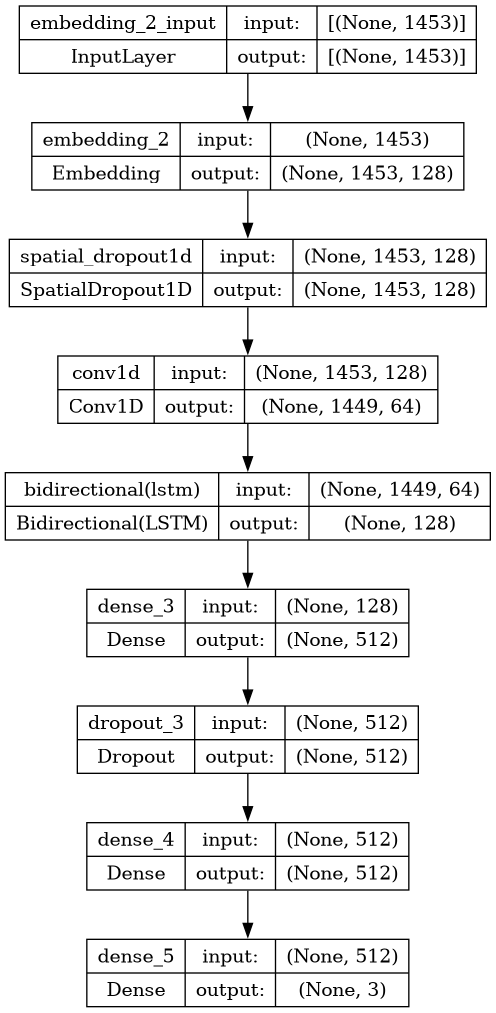

In [59]:
from tensorflow.keras.utils import plot_model
print(model_lstm.summary())
plot_model(model_lstm, "LSTM.png", show_shapes=True)

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [60]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

### **Training**

In [61]:
history = model_lstm.fit(x_train_LSTM, y_train_LSTM, validation_data=(x_val_LSTM, y_val_LSTM), epochs=2, batch_size=512,callbacks=[ReduceLROnPlateau], verbose=1)

Epoch 1/2


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


49/49 [==============================] - 3392s 69s/step - loss: 0.7135 - accuracy: 0.6889 - val_loss: 0.5150 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 2/2
49/49 [==============================] - 3818s 78s/step - loss: 0.4322 - accuracy: 0.8502 - val_loss: 0.4634 - val_accuracy: 0.8360 - lr: 0.0010


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


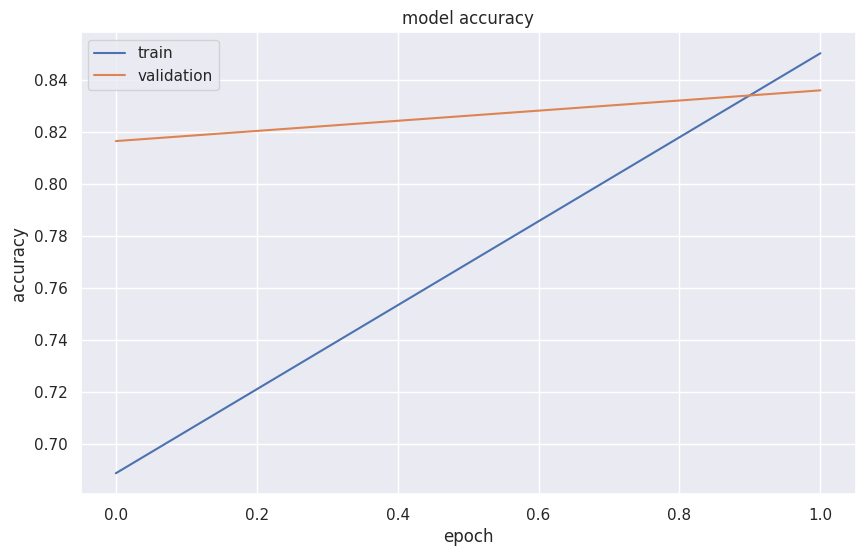

In [63]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **Model Prediction**

In [64]:
# Check data types of columns in df_test
print(test_df.dtypes)

ID                     int64
review_description    object
rating                 int64
dtype: object


**Preprocessing for test data**

In [65]:
test_df.review_description=test_df.review_description.apply(lambda x:emojiTextTransform(x))

In [66]:
test_df.review_description=test_df.review_description.astype(str)
test_df.review_description=test_df.review_description.apply(lambda x:re.sub(r'[^\w\s]','',x))

In [67]:
test_df.review_description=test_df.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))

In [68]:
test_df.review_description=test_df.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))

In [69]:
test_df.review_description=test_df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
test_df.review_description=test_df.review_description.apply(lambda x:" ".join(x))

In [70]:
test_descriptions = test_df['review_description'].values

# Replace NaN values with an empty string
test_descriptions = np.where(pd.isna(test_descriptions), '', test_descriptions)

# Tokenize the test data using the training tokenizer
test_sequences = tokenizer.texts_to_sequences(test_descriptions)
test_sequences = pad_sequences(test_sequences, maxlen=max_number_of_words, padding='post')


In [71]:
print(test_df.shape)

(1000, 3)


In [72]:
predictions_test = model_lstm.predict(test_sequences)

/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 554s 17s/step


In [73]:
print(predictions_test)

[[0.06038205 0.84640247 0.0932155 ]
 [0.01354    0.970345   0.0161149 ]
 [0.16632247 0.45246834 0.3812091 ]
 ...
 [0.10343999 0.64587814 0.25068182]
 [0.07164527 0.10781551 0.8205392 ]
 [0.01055111 0.01588202 0.9735668 ]]


In [74]:
predicted_Ratings = np.argmax(predictions_test, axis=1)
predicted_Ratings

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

In [75]:
ratingsDict = {1: 1, 0: 0, 2: -1}

predicted_Ratings_mapped = [ratingsDict[x] for x in predicted_Ratings]

predicted_Ratings_mapped

[1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1

# **Save the predictions to the required format**

In [76]:
test_ids = test_df['ID'].tolist()
test_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [77]:
# Create a DataFrame with two columns: "Id" and "Label"
resulted_df = pd.DataFrame({'ID': test_ids, 'rating': predicted_Ratings_mapped})

# Save the DataFrame to a CSV file
resulted_df.to_csv('submission.csv', index=False)